# Regresión Lineal con Iris Data

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/7mo Semestre/Colab Notebooks/DataSources/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.drop('Id', axis = 1, inplace = True)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
dummies = pd.get_dummies(df['Species'], prefix = 'Species')

In [10]:
dummies

,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [11]:
df = pd.concat([df, dummies], axis = 1)

In [12]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


In [13]:
df.rename(columns = {'Species_Iris-setosa' : 'Species_setosa'}, inplace = True)

In [14]:
df.rename(columns = {'Species_Iris-versicolor' : 'Species_versicolor'}, inplace = True)

In [15]:
df.rename(columns = {'Species_Iris-virginica' : 'Species_virginica'}, inplace = True)

In [16]:
corr = df.corr()

<ipython-input-16-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [17]:
alta_corr = np.where((corr > 0.95) & (corr < 1))

In [18]:
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_setosa,Species_versicolor,Species_virginica
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
Species_setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
Species_versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
Species_virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


In [19]:
alta_corr


(array([2, 3]), array([3, 2]))

In [20]:
baja_corr = np.where((corr < -0.95) & (corr > -1))

In [21]:
baja_corr

(array([], dtype=int64), array([], dtype=int64))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
df.drop('Species', axis = 1, inplace = True)

In [24]:
df_estandar = scaler.fit_transform(df)

In [25]:
df_estandar

array([[-0.90068117,  1.03205722, -1.3412724 , ...,  1.41421356,
        -0.70710678, -0.70710678],
       [-1.14301691, -0.1249576 , -1.3412724 , ...,  1.41421356,
        -0.70710678, -0.70710678],
       [-1.38535265,  0.33784833, -1.39813811, ...,  1.41421356,
        -0.70710678, -0.70710678],
       ...,
       [ 0.79566902, -0.1249576 ,  0.81962435, ..., -0.70710678,
        -0.70710678,  1.41421356],
       [ 0.4321654 ,  0.80065426,  0.93335575, ..., -0.70710678,
        -0.70710678,  1.41421356],
       [ 0.06866179, -0.1249576 ,  0.76275864, ..., -0.70710678,
        -0.70710678,  1.41421356]])

In [26]:
df_estandar = pd.DataFrame(df_estandar, columns = df.columns)

In [27]:
df_estandar

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_setosa,Species_versicolor,Species_virginica
0,-0.900681,1.032057,-1.341272,-1.312977,1.414214,-0.707107,-0.707107
1,-1.143017,-0.124958,-1.341272,-1.312977,1.414214,-0.707107,-0.707107
2,-1.385353,0.337848,-1.398138,-1.312977,1.414214,-0.707107,-0.707107
3,-1.506521,0.106445,-1.284407,-1.312977,1.414214,-0.707107,-0.707107
4,-1.021849,1.263460,-1.341272,-1.312977,1.414214,-0.707107,-0.707107
...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,-0.707107,-0.707107,1.414214
146,0.553333,-1.281972,0.705893,0.922064,-0.707107,-0.707107,1.414214
147,0.795669,-0.124958,0.819624,1.053537,-0.707107,-0.707107,1.414214
148,0.432165,0.800654,0.933356,1.447956,-0.707107,-0.707107,1.414214


In [28]:
from sklearn.model_selection import train_test_split
entrenamiento, prueba = train_test_split(df_estandar, test_size=0.20, random_state=42)

In [29]:
entrenamiento

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_setosa,Species_versicolor,Species_virginica
22,-1.506521,1.263460,-1.568735,-1.312977,1.414214,-0.707107,-0.707107
15,-0.173674,3.114684,-1.284407,-1.050031,1.414214,-0.707107,-0.707107
65,1.038005,0.106445,0.364699,0.264699,-0.707107,1.414214,-0.707107
11,-1.264185,0.800654,-1.227541,-1.312977,1.414214,-0.707107,-0.707107
42,-1.748856,0.337848,-1.398138,-1.312977,1.414214,-0.707107,-0.707107
...,...,...,...,...,...,...,...
71,0.310998,-0.587764,0.137236,0.133226,-0.707107,1.414214,-0.707107
106,-1.143017,-1.281972,0.421564,0.659118,-0.707107,-0.707107,1.414214
14,-0.052506,2.189072,-1.455004,-1.312977,1.414214,-0.707107,-0.707107
92,-0.052506,-1.050569,0.137236,0.001753,-0.707107,1.414214,-0.707107


In [30]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species_setosa', 'Species_versicolor', 'Species_virginica'],
      dtype='object')

In [31]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula = 'SepalLengthCm~SepalWidthCm+PetalLengthCm+PetalWidthCm+Species_setosa+Species_versicolor', data = entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     145.7
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           8.28e-48
Time:                        04:50:51   Log-Likelihood:                -49.544
No. Observations:                 120   AIC:                             111.1
Df Residuals:                     114   BIC:                             127.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0227      0

In [32]:
y_aprox = 0 + 0.2734*prueba['SepalWidthCm'] + 1.8574*prueba['PetalLengthCm'] - 0.4296*prueba['PetalWidthCm'] +  0.5349*prueba['Species_setosa'] + 0.1642*prueba['Species_versicolor']

In [33]:
y_aprox

73     0.686793
18    -0.554521
118    1.914345
78     0.369372
76     0.679454
31    -1.075309
64    -0.468268
141    0.329470
68    -0.073487
82    -0.221451
110    0.562178
12    -1.264551
36    -1.110327
9     -1.095663
19    -0.765766
56     0.777198
104    1.062042
69    -0.291502
55     0.419068
132    0.724266
29    -0.983256
127    0.337364
26    -0.969687
128    0.780747
131    2.314862
145    0.371827
108    0.971637
143    1.237714
45    -1.377513
30    -1.046522
dtype: float64

In [34]:
tabla = pd.DataFrame({'Real' : prueba['SepalLengthCm'], 'Prediccion' : y_aprox, 'Errores' : prueba['SepalLengthCm']-y_aprox})

In [35]:
tabla

,Real,Prediccion,Errores
73,0.310998,0.686793,-0.375796
18,-0.173674,-0.554521,0.380847
118,2.249683,1.914345,0.335339
78,0.189830,0.369372,-0.179542
76,1.159173,0.679454,0.479719
31,-0.537178,-1.075309,0.538131
64,-0.294842,-0.468268,0.173426
141,1.280340,0.329470,0.950871
68,0.432165,-0.073487,0.505653
82,-0.052506,-0.221451,0.168945


Text(0, 0.5, 'Prediccion')

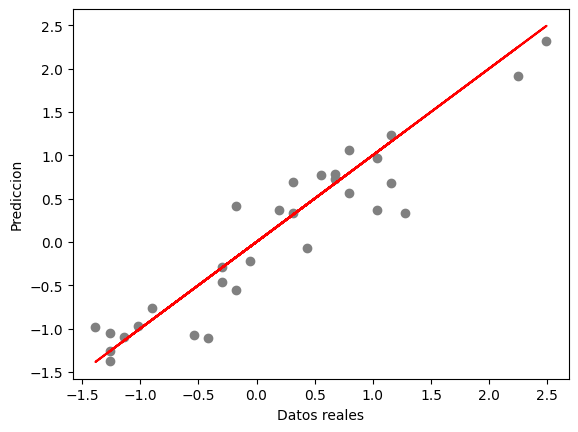

In [36]:
import matplotlib.pyplot as plt
plt.scatter(prueba['SepalLengthCm'], y_aprox, color = 'gray')
plt.plot(prueba['SepalLengthCm'], prueba['SepalLengthCm'], color = 'red')
plt.xlabel("Datos reales")
plt.ylabel("Prediccion")

In [37]:
l_residuos = len(tabla['Errores'])

Text(0, 0.5, 'valor del residuo')

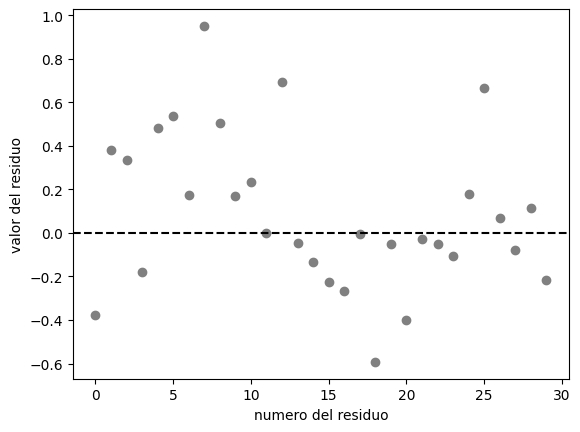

In [38]:
plt.scatter(range(l_residuos), tabla['Errores'], color = 'gray')
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.xlabel("numero del residuo")
plt.ylabel("valor del residuo")

Text(0, 0.5, 'Frecuencia (proba)')

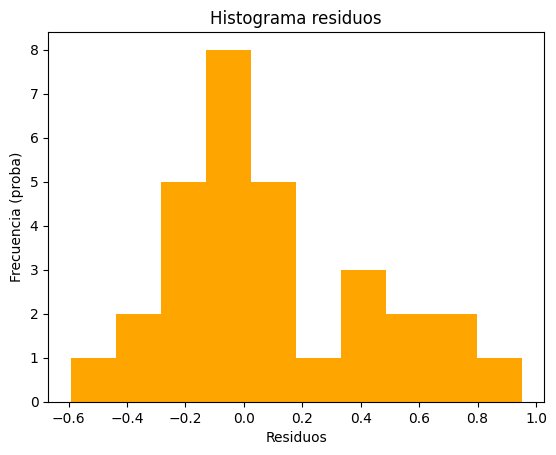

In [39]:
plt.hist(x = tabla['Errores'], color = 'orange')
plt.title("Histograma residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia (proba)")

In [40]:
media = tabla['Errores'].mean()
std = tabla['Errores'].std()
errores_est = (tabla['Errores'] - media)/std

In [41]:
import statsmodels.api as sm
from scipy import stats
stats.kstest(errores_est, 'norm')

KstestResult(statistic=0.13371601636027958, pvalue=0.6095294211476956, statistic_location=-0.25433775542243403, statistic_sign=1)

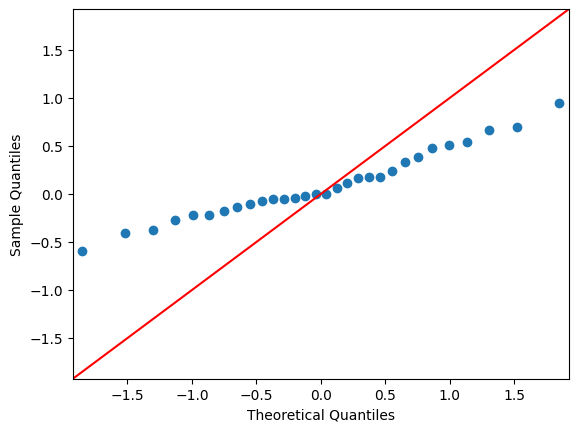

In [42]:
QQ = sm.qqplot(tabla['Errores'], stats.norm, line = '45')